In [1]:
#libs de dados
import pandas as pd
import numpy as np

#libs graficas
import matplotlib.pyplot as plt #sns no video
import seaborn as sn #sns no video

#avisos
import warnings
warnings.filterwarnings('ignore')

#config Pandas
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

#config Matplot
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')


baseData= pd.read_csv('./house_data.csv')

print('dimensão da base= '+ str(baseData.shape))

dimensão da base= (10692, 13)


In [2]:
#vendo dados
baseData.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
baseData.drop(columns=['fire insurance (R$)','total (R$)'],inplace=True)
baseData.isnull().sum().sort_values(ascending=False)


city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [4]:
#campos Unicos
baseData.nunique()


city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64


EDA

In [5]:
categoryColumns= baseData.columns[baseData.dtypes == object]  
numbersColumns= baseData.columns[baseData.dtypes != object]  

#analise dos categoricos
print(categoryColumns)

for column in categoryColumns:
    column
    baseData[column].value_counts(normalize=True)*100
    

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')


In [6]:
#consertando dados
baseData.loc[baseData['floor']== '301']
baseData.iloc[2562,5] = 30

In [7]:
#substituindo o - por 0
baseData['floor'] = baseData['floor'].apply(lambda r : 0 if r == '-' else r)

#substituindo tipos de dados
baseData['floor'] = pd.to_numeric(baseData['floor'])


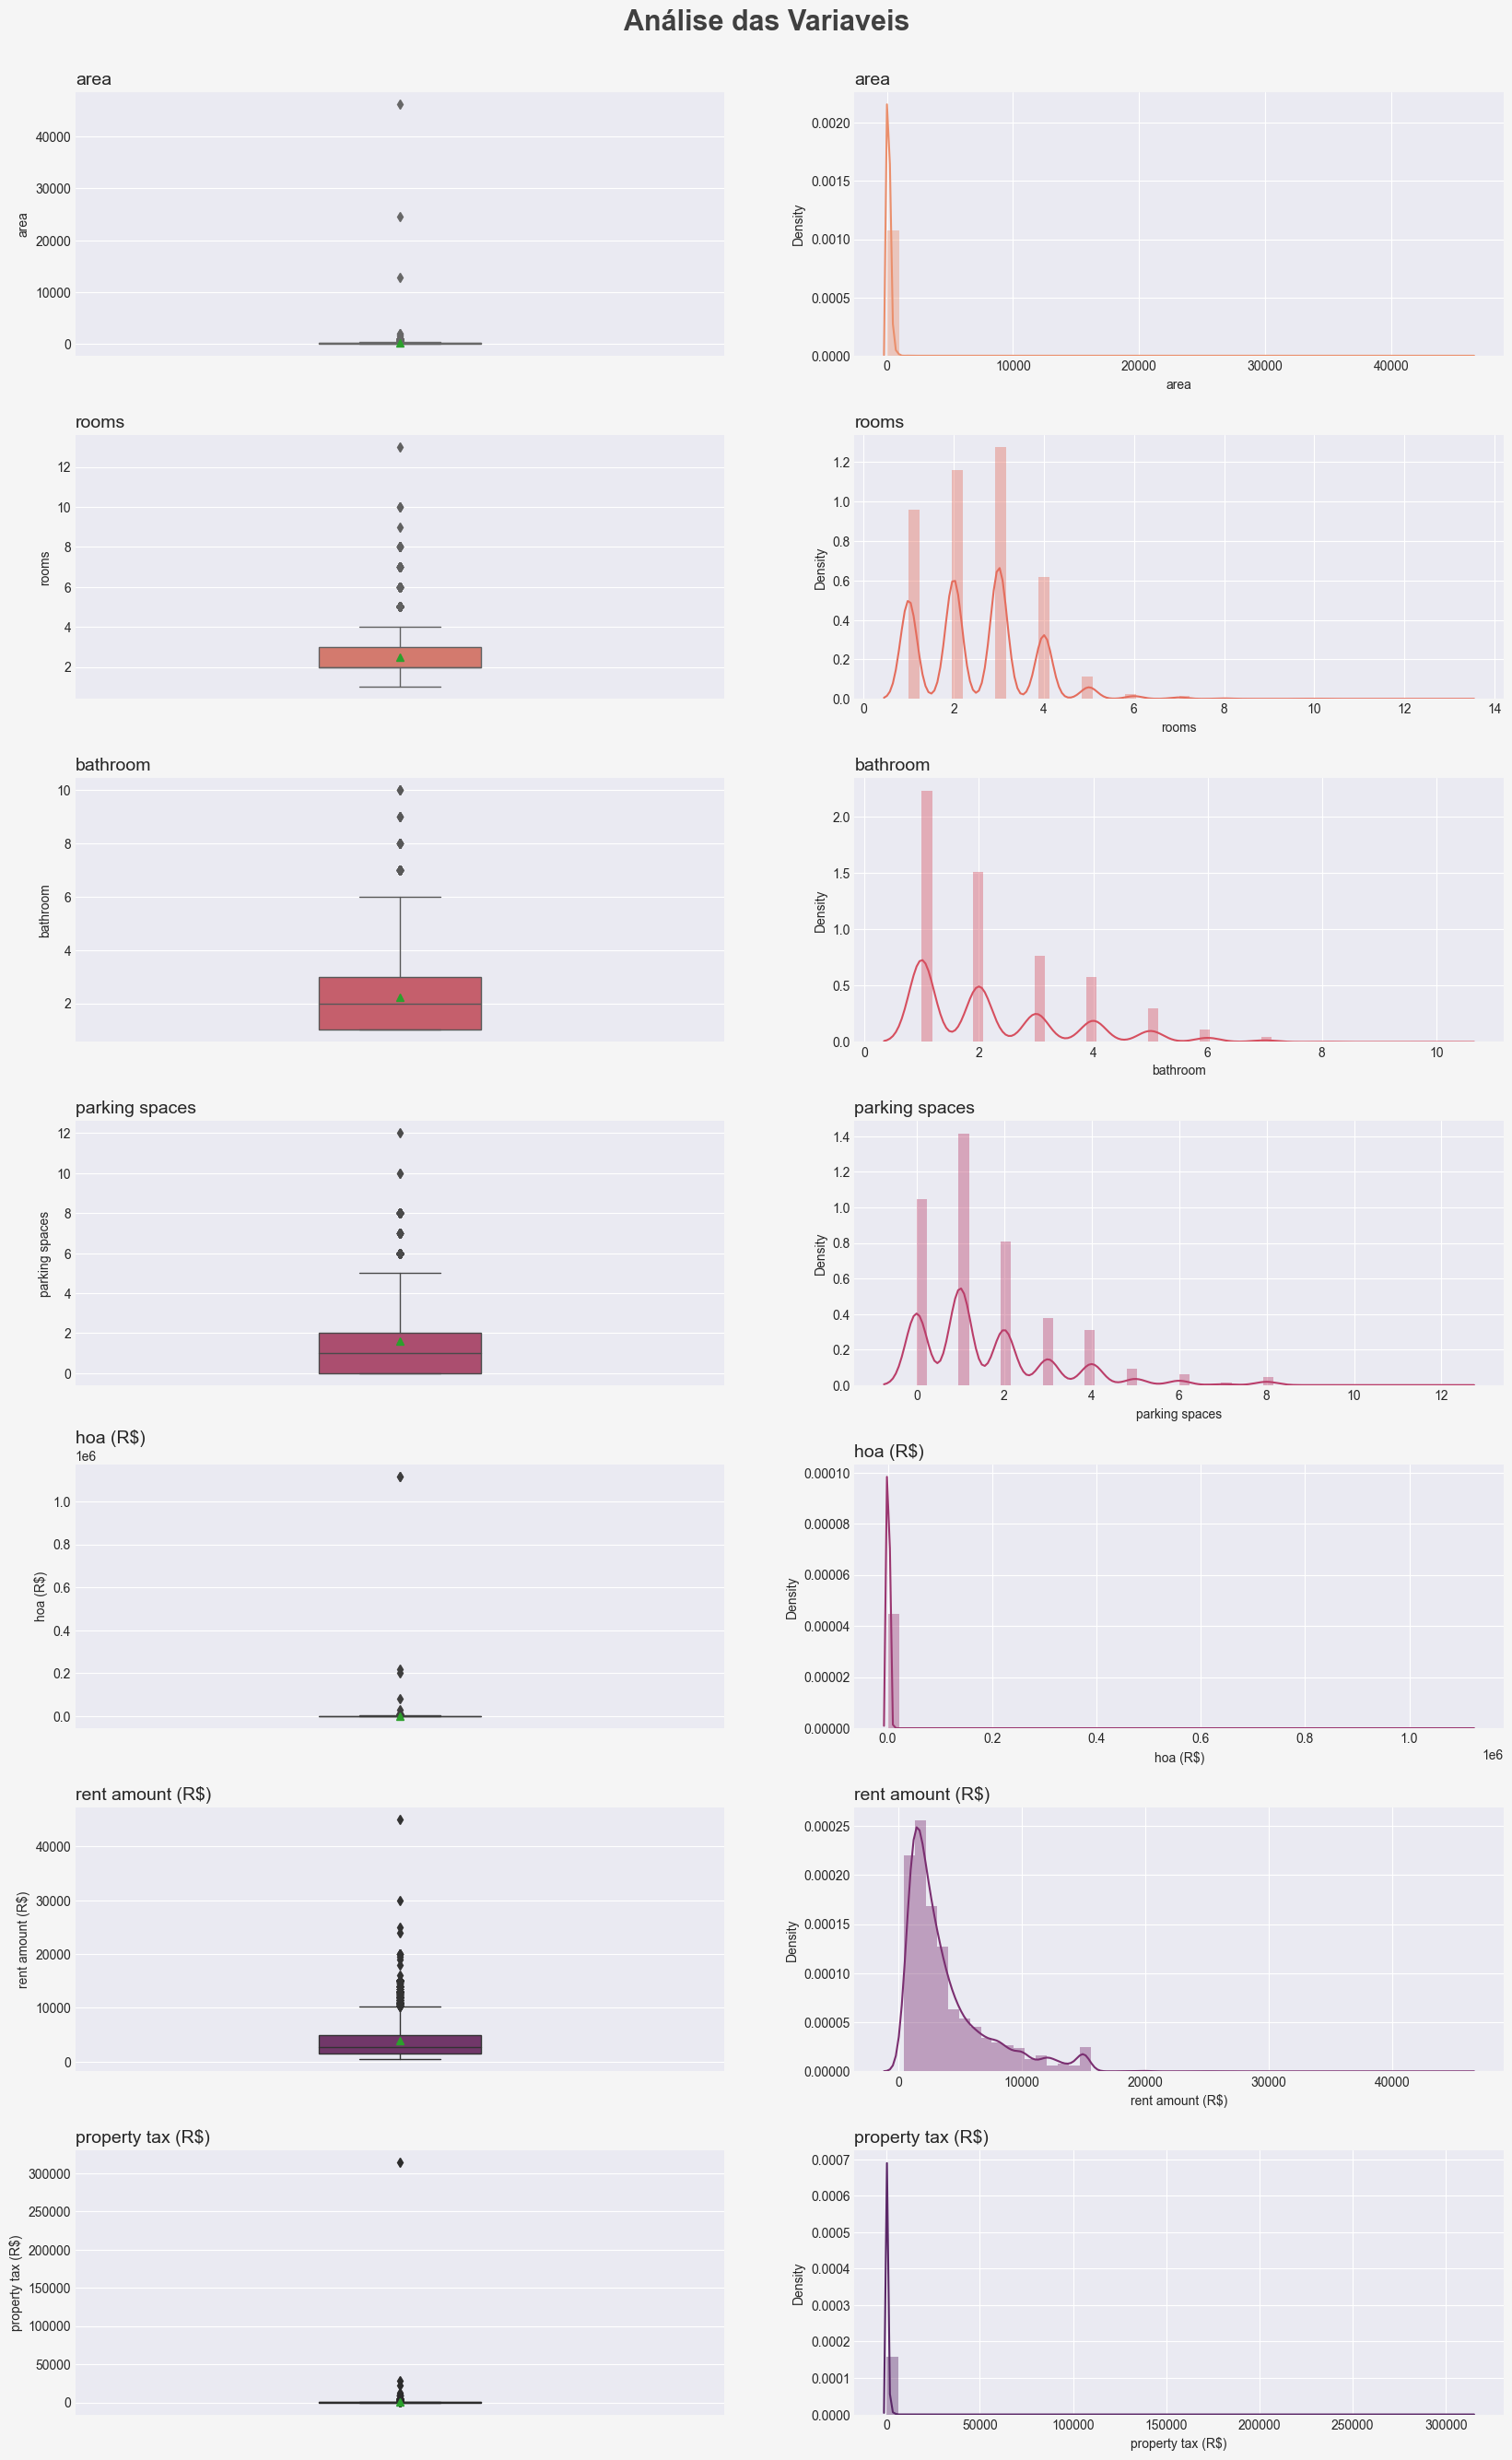

In [8]:

#GRID - GRAFICOS

#tamanho
Figura,eixo = plt.subplots(figsize=(20,30))


#cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de Cores
paletteOfColors=sn.color_palette('flare', len(numbersColumns) * 2)

#Titulo
plt.suptitle('Análise das Variaveis',fontsize=22,color='#404040',fontweight=600)

#Estrutura
rows=7
columns=2 #(boxplot- Distplot)
position=1


for column in numbersColumns:
    #plot no grid -- Boxplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.boxplot(data=baseData,y=column,showmeans=True,saturation=0.75,
               linewidth=1,color=paletteOfColors[position],width=0.25)
    
    position+=1

    #plot no grid -- Distplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.distplot(baseData[column],color=paletteOfColors[position-1])
    position+=1


#ajuste de grid
plt.subplots_adjust(top=0.95, hspace=0.3)



In [9]:
baseData.loc[baseData['area'] <= 10000]['area'].describe()


count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [10]:
baseData['hoa (R$)'].max()

1117000

In [11]:
baseData.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [12]:
baseData.loc[baseData['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [13]:
baseData.loc[baseData['hoa (R$)'] <= 10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [14]:
baseData['rent amount (R$)'].describe()
baseData.loc[baseData['rent amount (R$)'] <= 40000]['rent amount (R$)'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: rent amount (R$), dtype: float64

In [15]:
baseData['property tax (R$)'].describe()

count     10692.000000
mean        366.704358
std        3107.832321
min           0.000000
25%          38.000000
50%         125.000000
75%         375.000000
max      313700.000000
Name: property tax (R$), dtype: float64

engenharia de features

In [16]:
categoryColumns

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [17]:
baseData['furniture'].describe()

count             10692
unique                2
top       not furnished
freq               8086
Name: furniture, dtype: object

In [18]:
baseData['animal'].map({'acept':1,'not acept':0})

0        1
1        1
2        1
3        1
4        0
        ..
10687    0
10688    1
10689    0
10690    1
10691    1
Name: animal, Length: 10692, dtype: int64

In [19]:
#ajuste das colunas categoricas 
baseData['animal']=baseData['animal'].map({'acept':1,'not acept':0})
baseData['furniture']=baseData['furniture'].map({'furnished':1,'not furnished':0})

#filtro de cidade 
spFilter= baseData.loc[baseData['city'] =='São Paulo']

spFilter.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [20]:
#Retirando a coluna cidade 
spFilter.drop(columns=['city'],inplace =True)

In [21]:
#separa dados 
characteristics=spFilter.drop(columns=['rent amount (R$)'])
provisional=spFilter['rent amount (R$)']


#verificando
characteristics.shape,provisional.shape

((5887, 9), (5887,))

In [22]:
#characteristics
characteristics.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [23]:
spFilter.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


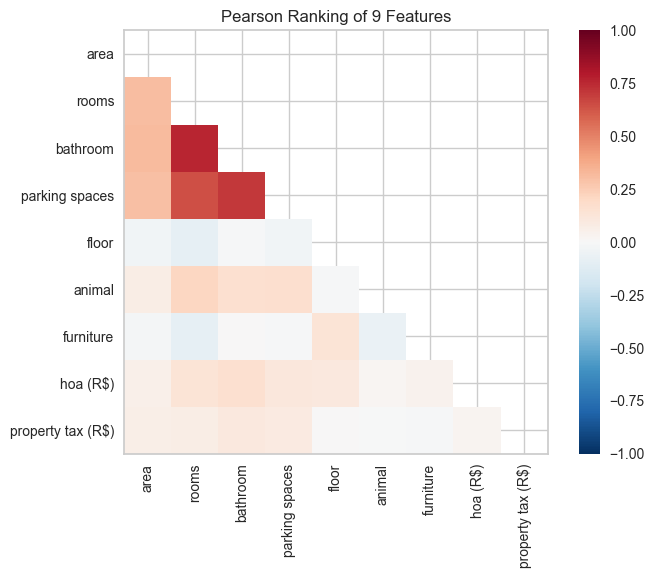

In [25]:
from yellowbrick.features import Rank2D

#metodo
correlation= Rank2D(algoritmo='pearson')

correlation.fit(characteristics,provisional)
correlation.transform(characteristics)
correlation.show();

In [ ]:
from sklearn.model_selection import train_test_split


x_treino,x_teste,y_treino,y_teste=train_test_split(characteristics,provisional)